In [10]:
import numpy as np
import pandas as pd
from scipy.optimize import *
from lmfit import Model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

date = datetime.datetime.now().strftime('%a, %d %b %Y %H-%M-%S %Z(%z)')
%matplotlib inline

#### Exposure Intensity ($mW/cm^2$)

In [11]:
# creating an empty list for exposure intensity
I_o = [] #exposure intensity
  
# number of elements as input 
n = int(input("# Enter number of Intensity to vary: ")) 
  
# iterating till the range 
for i in range(0, n): 
    intensity = float(input("Enter Intensity: ")) 
  
    I_o.append(intensity) # adding the element 
#I_o = np.array(I_o)
      
print("Exposure Intensity to vary: ", I_o)

# Enter number of Intensity to vary: 5
Enter Intensity: 0.1
Enter Intensity: 0.3
Enter Intensity: 0.5
Enter Intensity: 0.7
Enter Intensity: 0.9
Exposure Intensity to vary:  [0.1, 0.3, 0.5, 0.7, 0.9]


#### Exposure Time ($seconds$)

In [12]:
# creating an empty list for exposure time t 
t = []  #Exposure time, t
  
# number of elements as input 
n = int(input("# Enter number of time to vary : ")) 
  
# iterating till the range 
for i in range(0, n): 
    exp_time = float(input("Enter time: ")) 
  
    t.append(exp_time) # adding the element 
#t = np.array(t)      
print("Exposure time to measure: ", t)

# Enter number of time to vary : 6
Enter time: 0.5
Enter time: 1.5
Enter time: 2.3
Enter time: 4
Enter time: 6
Enter time: 8
Exposure time to measure:  [0.5, 1.5, 2.3, 4.0, 6.0, 8.0]


#### Input Parameters

In [27]:
def inputparameters():
    #u = input("Concentration of the monomer: ")
    u_m = input("Initial Monomer Concentration: ") #typical value 
    #D = input("Diffusion coefficient: ")
    #I = input("Light intensity: ")
    k_o = input("Polymerization coefficient: ") #value can be modified based on experiment e.g 0.45
    tau_d = input("Diffusion time constant τD: ") #value can be modified based on experiment e.g 3.5
    #t = input("Exposure time: ") #uncomment to run for a single number 
    #I_o = input("Exposure Intensity: ") #uncomment to run for a single number
    phi = 0.0082 #constant relating to material φ
    delta_nm = input("Maximum amplitude of the grating modulation: ") #Delta_n_M = Cn*δ*U_m e.g. 0.0143
    m = 1 #constant
    I_t = 0.01 #Lowest intensity required for the material exposure that can be measured by the experiemnt
    t_p = input("Polymerization time: ") #Smaller than exposure time t typycal is 8.2, 3.1
    w = 10^5;
    small_delta = 0.90 #Order of magnitude of light reaction δ
    C_n = float(delta_nm)/(float(small_delta)*float(u_m))
    gamma = float(k_o)/phi  #constant 54.8780, 0.0143
    print ("\n", "\n", "Input Parameters\n", "Initial Monomer Concentration 𝑈𝑚: ", u_m, "\n", "Polymerization coefficient Ko: ", k_o, "\n", 
            "Diffusion time constant τD: ", tau_d, "\n","Maximum amplitude of the grating modulation Δ𝑛𝑚: ", delta_nm, "\n",
           "Polymerization time tp: ", t_p, "\n", "\n", "Constants\n", "m: ", m, "\n","C_n: ", C_n,"\n", 
            "Lowest Intensity required I_t: ", I_t, "\n","phi φ: ", phi, "\n","Order of magnitude of light reaction δ: ", small_delta,"\n", "Gamma: ", gamma, "\n",
            "Model Accuracy Constant (w): ", w)
    
    return (u_m, k_o,tau_d, delta_nm, t_p, m, C_n, I_t, phi, small_delta, gamma, w)    

def writeinput():
    all_ = ["Date: ", str(date), "\n", "\n", "Input Parameters\n", "Initial Monomer Concentration 𝑈𝑚: ", str(u_m),  "\n", "Polymerization coefficient Ko: ", str(k_o), "\n", 
           "Diffusion time constant τD: ", str(tau_d), "\n", "Maximum amplitude of the grating modulation Δ𝑛𝑚: ", str(delta_nm), "\n", 
           "Polymerization time tp: ", str(t_p), "\n", "\n", "Constants\n", "m: ", str(m), "\n", "C_n: ", str(C_n), "\n",  "Lowest Intensity required I_t: ", str(I_t), "\n",
            "phi φ: ", str(phi), "\n", "Order of magnitude of light reaction δ: ", str(small_delta), "\n", "Gamma: ", str(gamma), "\n", "Model Accuracy Constant (w): ", str(w), "\n" ]
    return (all_)

inputparameters()

Initial Monomer Concentration: 2.5
Polymerization coefficient: 0.45
Diffusion time constant τD: 3.5
Maximum amplitude of the grating modulation: 0.0143
Polymerization time: 8.2

 
 Input Parameters
 Initial Monomer Concentration 𝑈𝑚:  2.5 
 Polymerization coefficient Ko:  0.45 
 Diffusion time constant τD:  3.5 
 Maximum amplitude of the grating modulation Δ𝑛𝑚:  0.0143 
 Polymerization time tp:  8.2 
 
 Constants
 m:  1 
 C_n:  0.006355555555555555 
 Lowest Intensity required I_t:  0.01 
 phi φ:  0.0082 
 Order of magnitude of light reaction δ:  0.9 
 Gamma:  54.8780487804878 
 Model Accuracy Constant (w):  15


('2.5',
 '0.45',
 '3.5',
 '0.0143',
 '8.2',
 1,
 0.006355555555555555,
 0.01,
 0.0082,
 0.9,
 54.8780487804878,
 15)

### Diffusion Model Theory

***References:***  
1.  G. Zhao and P. Mouroulis, “Diffusion model of hologram formation in dry photopolymer materials,” J. Mod. Opt. 41, 1929–1939 (1994).  
2. S. Gallego, C. Neipp, M. Ortuño, A. Beléndez, E. Fernández, and I. Pascual, “Analysis of monomer diffusion in depth in photopolymer materials,” Opt. Commun. 274, 43–49 (2007)  
3. S. Piazzolla and B. K. Jenkins, “First-harmonic diffusion model for holographic grating formation in photopolymers,” J. Opt. Soc. Am. B 17, 1147–1157 (2000).  
4. H. Li, Y. Qi, R. E. Malallah, and J. T. Sheridan, “Three-dimensional numerical model of holographic grating formation in photopolymer materials,” Proc. SPIE 9508, 95080B (2015)  
5. J. Christmann, C. Ley, X. Allonas, A. Ibrahim, and C. CroutxéBarghorn, “Experimental and theoretical investigations of free radical photopolymerization: Inhibition and termination reactions,” Polymer 160, 254–264 (2019)  
6. Ma, J., Wu, T., Cui, Y., Li, J., Wang, J. and Su, P., 2020. Modified monomer diffusion model for volume holographic grating formation in photopolymers. Applied Optics, 59(13), pp.3952-3958.  

****

##### Historical Review
* ***Zhao et al***. solved diffusion equation for sinusoidal exposure in photopolymers using low-order harmonic approximation [1]   
    + _Found that monomer concentration has monotonic relationship with refractive index modulation_ <br>
    + _Monomer molecules diffusion was responsible for volume holographic grating_  

$$\frac{du(x,t)}{dt} = \frac{\partial }{\partial x} \left({D(x,t)\frac{u(x,t)}{dx}} \right) - F(x,t)u(x,t)$$

 where:

<p style="text-align: left;">    
    <br> $u(x,t)$ is monomer concentration    <br>
    $F(x,t)$ is rate of polymerization    <br>
    $D(x,t)$ is diffusion coefficient    <br>
</p>


* ***Piazolla and Jenkins***. used first order diffusion equation to obtain specific analytical solution of the monomer diffusion model [3]  
   +  _Considered photopolymers and free monomer diffusion during holographic exposure_ <br>
   +  _Predicts variation in the saturated diffraction efficiency with exposure intensity_ <br>
   + _Basic equation proposed is:
    
$$\frac{du(x,t)}{dt} = \frac{\partial }{\partial x} D  \frac{\partial }{\partial x}u(x,t) - k(t)I^\delta u(x,t)$$

 where:

<p style="text-align: left;">    
    <br> $u(x,t)$ is monomer concentration    <br>
    $D$ is diffusion coefficient    <br>
    $k(t)$ is polymerization coefficient    <br>
    $I(x)$ is light intensity    <br>
    $\delta$ is the order of magnitude of light reaction    <br>
    $k(t)I^\delta(x)$ is the polymerization rate </p>
 
$$ u(x,t) = u_o (t) - u_1 (t) \cos (kx) $$

 where:

<p style="text-align: left;">    
    <br> $u_o(t)$ is the dc term    <br>
    $u_o(t)$ is first order amplitude    <br>
    $k$ is the interference fringe vector    <br>
     </p>

$$\frac{d \Delta_n(t)}{dt} = C_n  \left(\frac {u_1(t)}{\tau_D}\right)$$

 where:

<p style="text-align: left;">    
    <br> $\tau$ is polymerization constant  <br>
    $\tau_D$ is Diffusion constant    <br>
    $t$ is exposure time    <br>
     </p>

[3] obtained refractive index modulation as follow:

$$ \Delta_n(t) = \frac{m \tau \Delta_nm}{\tau_D + \tau} \left [1 - \exp(\gamma[1 - \exp(\frac{t}{\tau}) \right] - \frac{\tau_D \gamma}{\tau_D \gamma + \tau}\left [1 - \exp \left(\frac {\tau_D \gamma}{- \tau_D \gamma + \tau}\right)\right]$$ 
    
 where:

<p style="text-align: left;">    
    <br> $m$ is a constant    <br>
    $\Delta_nm = C_n \delta U_m$ is the maximum amplitude of the grating modulation    <br>
    $C_n$ is a constant    <br>
    $U_m$ is the initial monomer concentration    <br>
    $k_0$ is polymerization coefficient    <br>
    $\gamma$ = $k_0 \phi$ is is a constant    <br>
    $I$ is exposure intensity    <br>
    $\tau = \frac{1}{\phi I^\delta}$ polymerization time constant    <br>
    $\delta$ and $\phi$ are constants whose values relates to material </p>    

* ***Gallego et al***. developed a 3D photopolymer model based on the thick volume holographic grating, they assumed that change in depth direction of the monomer was very small and could be neglected [2]



* ***Li et al***. developed a 3D numerical model to describe the change in refractive index of the volume holographic grating in the x, y and z direction [4]



* ***Christmann et al*** discussed the role of disolved oxygen in intial radical polymerization stage [5]

#### Pazzolla Diffusion Model

In [14]:
def Index_Modulation_Piazzolla():
        d_n1 = []
        Exposure_Time = []
        Exposure_Intensity = []
        for i in t:
            for k in I_o:
                tau = 1/(phi*np.power(k, float(small_delta)))
                dp = ((m*float(tau)*float(delta_nm))/(float(tau_d) + float(tau))) * (1-np.exp(float(gamma)*(1-np.exp(i/float(tau))))-((float(tau_d)*float(gamma))/((float(tau_d)*float(gamma))+float(tau)))*(1-np.exp(-((float(tau_d)*float(gamma))+float(tau))/(float(tau_d)*float(gamma)))*i))
                d_n1.append(dp)
                Exposure_Time.append(i)
                Exposure_Intensity.append(k)
        data_p=[]        
        for time,I,dn in zip(Exposure_Time, Exposure_Intensity,d_n1):
            dat_p = {'Exposure_Time': time, 'Exposure_Intensity':I, 'Index_Modulation':dn}
            data_p.append(dat_p)
            df1 = pd.DataFrame(data_p, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
            df1.fillna(0, inplace=True)
        return df1

Constrast_p = Index_Modulation_Piazzolla()

In [15]:
#Convert data to dataframe and saving input and output
df1 = pd.DataFrame(Constrast_p, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
filename1 = date + "Piazzolla_Diffusion_Model" + " Output"
filename2 = date + "Piazzolla_Diffusion_Model" + " Input Parameters"
F = open(filename2 + ".txt", "a", encoding='utf-8')
F.writelines(writeinput())
F.close()
df1.to_csv(filename1, encoding='utf-8', index=False)
df1.head(20) #To view the top 20 alone
#df1 #To view all

,Exposure_Time,Exposure_Intensity,Index_Modulation
0,0.5,0.1,-0.001957
1,0.5,0.3,-0.003746
2,0.5,0.5,-0.004482
3,0.5,0.7,-0.004785
4,0.5,0.9,-0.004873
5,1.5,0.1,-0.001188
6,1.5,0.3,-0.001610
7,1.5,0.5,-0.001072
8,1.5,0.7,-0.000310
9,1.5,0.9,0.000466


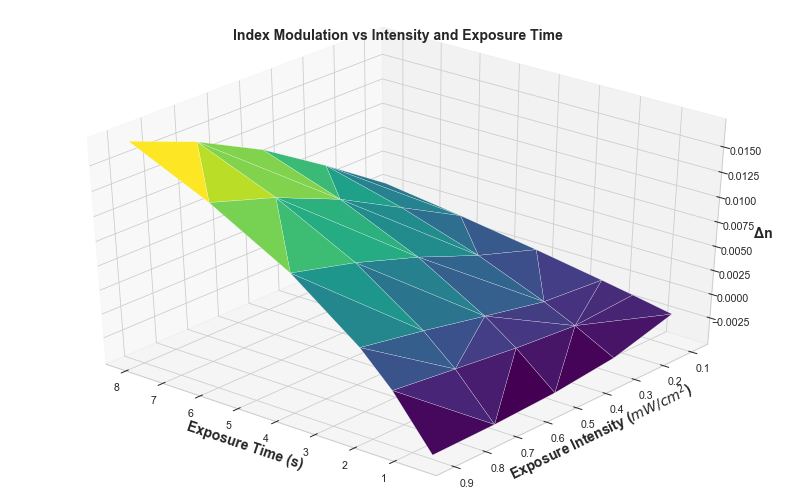

In [17]:
fig = plt.figure(figsize =(14, 9))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df1['Exposure_Time'], df1['Exposure_Intensity'],df1['Index_Modulation'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(35, 130)
#fig.colorbar(surf, shrink=0.6, aspect=9)
ax.set_title('Index Modulation vs Intensity and Exposure Time', fontsize=14, fontweight="bold");
ax.set_ylabel('Exposure Intensity ($mW/cm^2$)', fontsize=14, fontweight="bold")
ax.set_xlabel('Exposure Time (s)', fontsize=14, fontweight="bold")
ax.set_zlabel('Δn', fontsize=14, fontweight="bold");

plt.savefig('Piazzolla Diffusion Model' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc
plt.show()

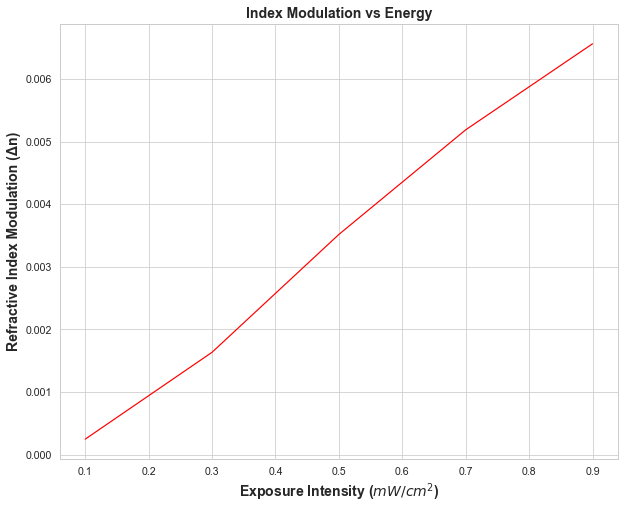

In [19]:
fig, (ax1) = plt.subplots(figsize=(10,8))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":10})
ax1 =sns.set_context("paper", font_scale=1.2)

ax1 = sns.lineplot(x = df1['Exposure_Intensity'], y = df1['Index_Modulation'], color="red", ci=None)
ax1.set_title('Index Modulation vs Energy', fontsize=14, fontweight="bold");
ax1.set_xlabel('Exposure Intensity ($mW/cm^2$)', fontsize=14, fontweight="bold");
ax1.set_ylabel('Refractive Index Modulation (Δn)', fontsize=14, fontweight="bold");

### Modified Diffusion Model [5]

Subsitute the following into Piazzolla model: <br>
$$\Delta_nm = C_n \delta U_m$$ <br>
$$\tau = \frac{1}{\phi I^\delta}$$


$$ \Delta_n(t) = \frac {m C_n \delta U_m}{\phi I_0^\delta (\tau_D + \frac{1}{\phi I_0^\delta})}* \left[1- \exp \left(\frac{k_0[1-\exp(t_p \phi I_0^\delta)]}{\phi} \right)\right] - \frac {\tau_D k_0}{\phi I_0^\delta(\tau_D + \frac{1}{\phi I_0^\delta})} \left[1-\exp \frac{\frac{-\tau_D k_0}{\phi} + \frac{1}{\phi I_0^\delta} t_p \phi I_0^\delta }{\tau_D}\right] * \frac{1}{1+\exp[-w(I_0 - I_t]}\frac{1}{1+\exp[-w[t-\psi\exp(-\alpha I_0)]]} $$


#### Threshold added to Piazolla Model by [5]

* light intensity factor is the second to the last part of the equation and 
$$ \frac{1}{1+\exp[-w(I_0 - I_t]} $$
* oxygen molecule inhibitor factor is the last part
$$ \frac{1}{1+\exp[-w[t-\psi\exp(-\alpha I_0)]]} $$

*if $I_0$ ≥ $I_t$, $t$ the threshold factor of light intensity is $1$;*

*if $I_0$ < $I_t$ , the value of the light intensity threshold factor is $0$, and there is no refractive index, the modulation phenomenon occurs*

*For oxygen molecule inhibitors, if $t_p$ ≥ $0$, the oxygen molecule inhibitor*
factor is $1$, which means that oxygen does not undergo chemical reaction, and polymerization proceeds;*

*if $t_p$ < $0$, the oxygen molecule inhibitor factor is $0$, which means that polymerization
is inhibited by the dissolution of oxygen, and the refractive index modulation is  $0$*

#### Modified Model (This model is not yet working as desired)

In [20]:
def Index_Modulation():
        d_n = []
        Exposure_Time = []
        Exposure_Intensity = []
        for i in t:
            for k in I_o:
                polymerization_time_parameters = (i - float(t_p))/(np.exp(k))
                """polymerization_time_parameters = − ψ exp(−α)
                Calcualted from tp  = t − ψ exp(−α)
                psi = Oxygen time constant ψ             
                """
                light_intensity_factor =(1/(1+np.exp(-w*(k - I_t))))
                oxygen_molecule_inhibitor_factor = (1/(1+np.exp(-w*(i-polymerization_time_parameters))))            
                d = ((m*float(delta_nm))/(float(phi)*np.power(k,float(small_delta))*((float(tau_d))+(1/phi*np.power(k,float(small_delta))))))*(1-np.exp(float(k_o)*(1-np.exp(float(t_p)*float(phi)*np.power(k,float(small_delta))))/float(phi))-((float(tau_d)*float(k_o))/((float(phi))*((float(tau_d)*float(k_o)/float(phi))+(1/(float(phi)*np.power(k,float(small_delta)))))))*(1-np.exp(-(((float(tau_d)*float(k_o)/float(phi))+(1/(float(phi)*np.power(k,float(small_delta)))))/(float(tau_d)))*(float(t_p)*float(phi)*np.power(k,float(small_delta))))))*light_intensity_factor*oxygen_molecule_inhibitor_factor
                d_n.append(d)
                Exposure_Time.append(i)
                Exposure_Intensity.append(k)
        data=[]        
        for time,I,dn in zip(Exposure_Time, Exposure_Intensity,d_n):
            dat = {'Exposure_Time': time, 'Exposure_Intensity':I, 'Index_Modulation':dn}
            data.append(dat)
            df = pd.DataFrame(data, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
            df.fillna(0, inplace=True)
        return df

Constrast = Index_Modulation()

In [21]:
#Convert data to dataframe
df = pd.DataFrame(Constrast, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
filename1 = date + "Modified_Diffusion_Model " + "Output"
filename2 = date + "Modified_Diffusion_Model " + "Input"
F = open(filename2 + ".txt", "a", encoding='utf-8')
F.writelines(writeinput())
F.close()
df.to_csv(filename1, encoding='utf-8', index=False)
df.head(20)

,Exposure_Time,Exposure_Intensity,Index_Modulation
0,0.5,0.1,0.126813
1,0.5,0.3,0.043087
2,0.5,0.5,0.019595
3,0.5,0.7,0.010610
4,0.5,0.9,0.006396
5,1.5,0.1,0.126813
6,1.5,0.3,0.043087
7,1.5,0.5,0.019595
8,1.5,0.7,0.010610
9,1.5,0.9,0.006396


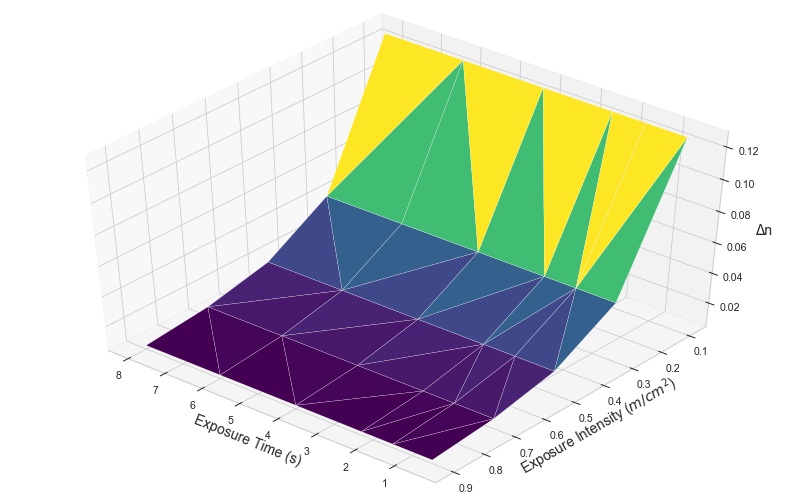

In [22]:
fig = plt.figure(figsize =(14, 9))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Exposure_Time'], df['Exposure_Intensity'],df['Index_Modulation'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(45, 130)
#fig.colorbar( surf, shrink=0.6, aspect=9)
ax.set_ylabel('Exposure Intensity ($m/cm^2$)', fontsize=14)
ax.set_xlabel('Exposure Time (s)', fontsize=14)
ax.set_zlabel('Δn', fontsize=14);
plt.show()

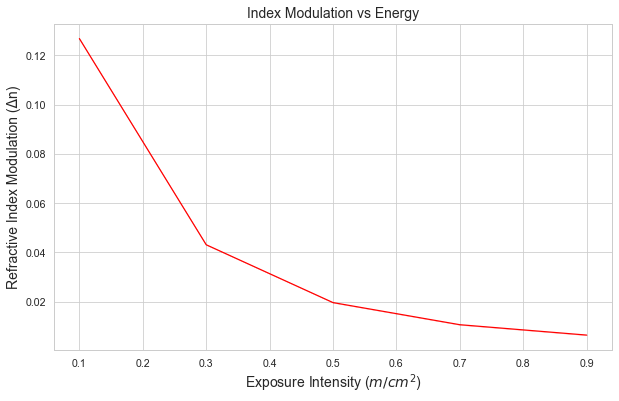

In [23]:
fig, (ax1) = plt.subplots(figsize=(10,6))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":10})
ax1 =sns.set_context("paper", font_scale=1.2)

ax1 = sns.lineplot(x = df['Exposure_Intensity'], y = df['Index_Modulation'], color="red")
ax1.set_title('Index Modulation vs Energy', fontsize=14);
ax1.set_xlabel('Exposure Intensity ($m/cm^2$)', fontsize=14);
ax1.set_ylabel('Refractive Index Modulation (Δn)', fontsize=14);